In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

In [2]:
# Step 2: Load Cleaned Data
df = pd.read_csv("../data/cleaned_data.csv")
df.head()


,ID,Entity,Sentiment,Tweet,cleaned_tweet,text_length,word_count,has_hashtag,has_mention
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder,29,4,0,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill,19,3,0,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill,27,4,0,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder,28,4,0,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder,29,4,0,0


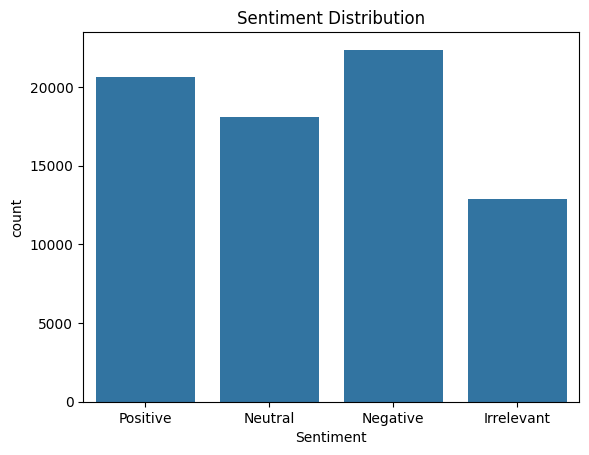

In [3]:
# Step 3: Sentiment Distribution
sns.countplot(data=df, x="Sentiment")
plt.title("Sentiment Distribution")
plt.savefig("../outputs/visualizations/sentiment_distribution.png")
plt.show()

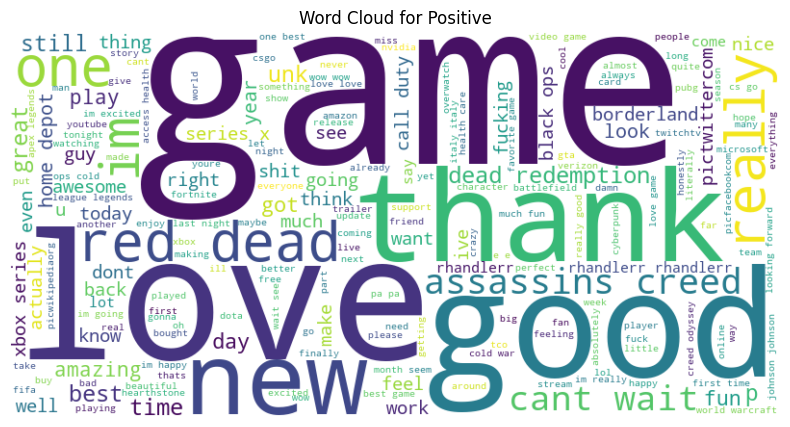

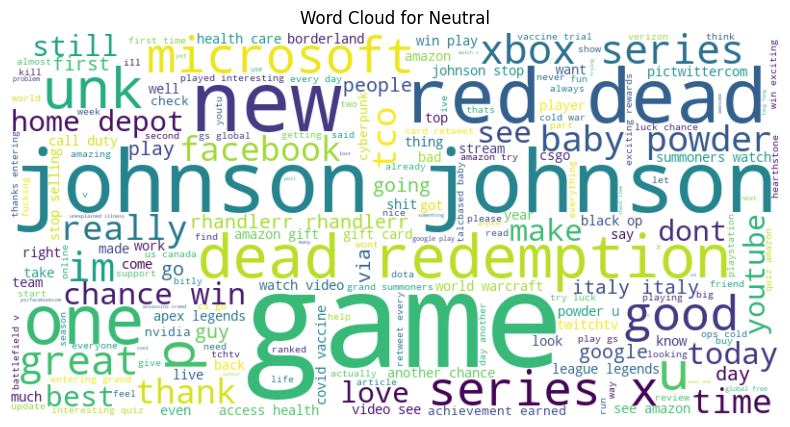

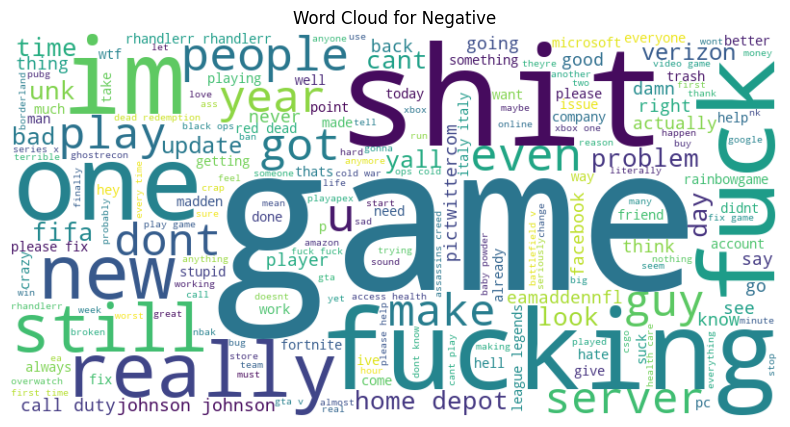

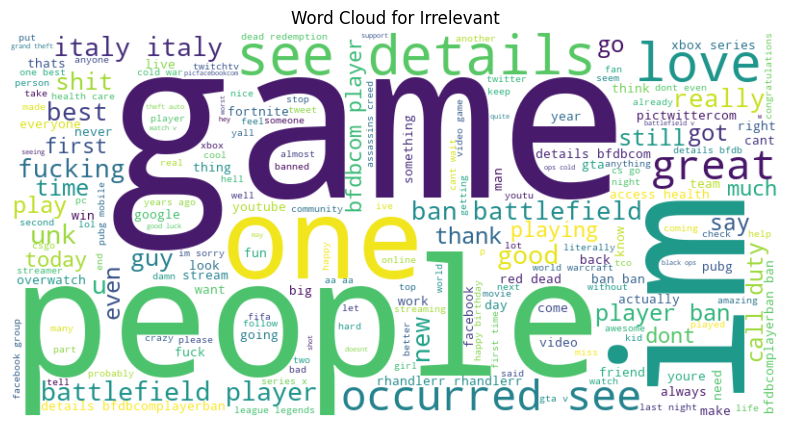

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 4: Word Clouds
for sentiment in df["Sentiment"].unique():
    # Select and join all tweets for that sentiment
    text = " ".join(df[df["Sentiment"] == sentiment]["cleaned_tweet"].dropna().astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Show it
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment}")
    plt.show()


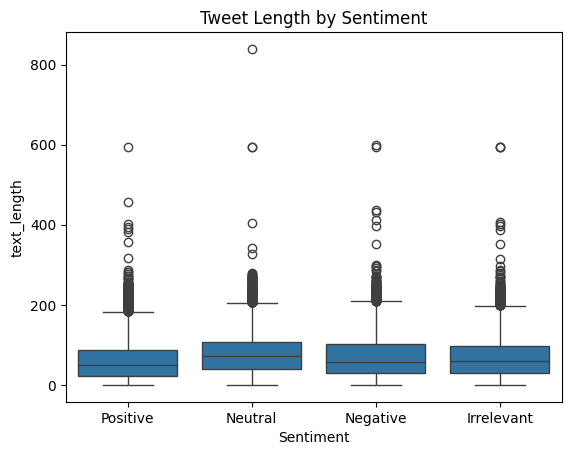

In [5]:

# Step 5: Boxplot of Text Length by Sentiment
sns.boxplot(x="Sentiment", y="text_length", data=df)
plt.title("Tweet Length by Sentiment")
plt.savefig("../outputs/visualizations/length_by_sentiment.png")
plt.show()

In [6]:
# Step 6: Interactive Plot with Plotly
fig = px.histogram(df, x="Sentiment", color="Sentiment", title="Interactive Sentiment Distribution")
fig.show()